# Z-scores
- In this lesson, we will learn to use z-scores to describe the location of a value within a distribution. Z-scores are useful for comparing values coming from different distributions with different means and standard deviations.


- We will also learn to standardize distributions and discussed a few situations where that might be useful. It's worth mentioning that standardization is also useful for some machine learning algorithms that we'll learn about in later courses. Also, z-scores in general are key elements in understanding confidence intervals and hypothesis testing, which we'll discuss in later courses.


- We will continue to use the AmesHousing_1.txt dataset for our purpose.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
dataset_loc = "D:/Dataquest/Dataquest 2022 Learning/Datasets/"
df = pd.read_table(dataset_loc + "AmesHousing_1.txt")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<IPython.core.display.Javascript object>

In [32]:
# Let's sample randomly one sale price from the SalePrice column and see what can we say about the sampled value:
sample = df['SalePrice'].sample(1,random_state=0)
print(sample)

mean_price = df['SalePrice'].mean()
print(f'Average Selling Price is {mean_price}')

std_price = df['SalePrice'].std(ddof=0)
print(f'Standard Deviation is {std_price}')

2216    220000
Name: SalePrice, dtype: int64
Average Selling Price is 180796.0600682594
Standard Deviation is 79873.05865192247


- The sampled house (220,000) is clearly more expensive than the average house (roughly $180,796), but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.

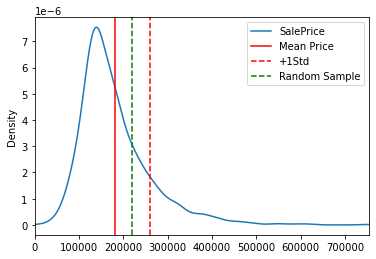

In [33]:
df['SalePrice'].plot.kde(xlim=(0,df['SalePrice'].max()))
plt.axvline(mean_price,label='Mean Price',color='red')
plt.axvline(mean_price + std_price,label='+1Std',color='red',linestyle='--')
plt.axvline(220000,label='Random Sample',color='green',linestyle='--')
plt.legend()

In [34]:
st_devs_away= (220000-mean_price) / std_price
st_devs_away
print(f'220000 is about {round(st_devs_away,1)} standard deviation from the mean')

220000 is about 0.5 standard deviation from the mean


Let's try to describe this process algebraically: for any value **x** in a population with mean **μ** and standard deviation **σ**, the number of standard deviations away from the mean is given by the formula below, where we denote the number of **standard deviations away from the mean with z**:

## z = (x - μ) / σ   ==> For population Z-score

The value representing the number of standard deviations away from the mean is commonly known as the **standard score**, or the   **z-score**. We'll use the term "z-score" throughout our courses

Z-scores can also be defined fairly easy for samples. For any value x in a sample with **mean $\bar{x}$** and standard deviation **s** (with Bessel's correction), the z-score z is given by the formula:

## z = (x - $\bar{x}$ ) / s  ==> For sample Z-score

The z-scores we've dealt with so far were all positive, but we can have negative z-scores as well. Let's consider again one of the samples from the last screen (the one with a mean $\bar{x}$ of $180,000, and a standard deviation s of $40,000). A price of $100,000 will have a z-score of -2:

![statistics-pic-10](https://raw.githubusercontent.com/tongNJ/Dataquest-Online-Courses-2022/main/Pictures/statistics-pic-10.PNG)

We can see that a z-score has two parts:

- The sign, which indicates whether the value is above or below the mean.
- The value, which indicates the number of standard deviations that a value is away from the mean.
Generally, the sign of a z-score is written out even if the z-score is positive. If a value is two standard deviations away from the mean, we should write that the z-score is +2, not 2.

In [36]:
def cal_z(value, array, ddof=0):
    mean = sum(array)/len(array)
    std = np.std(array,ddof=ddof)
    z = (value-mean)/std
    return z

In [37]:
min_val = df['SalePrice'].min()
mean_val = df['SalePrice'].mean()
max_val = df['SalePrice'].max()

min_z = cal_z(min_val,df['SalePrice'],ddof=0)
mean_z = cal_z(mean_val,df['SalePrice'],ddof=0)
max_z = cal_z(max_val,df['SalePrice'],ddof=0)

print(f'Z-score for the minimum sales price is {min_z}')
print(f'Z-score for the mean sales price is {mean_z}')
print(f'Z-score for the max sales price is {max_z}')

Z-score for the minimum sales price is -2.1034258973406126
Z-score for the mean sales price is 0.0
Z-score for the max sales price is 7.188956446929806


### Test
Let's now consider an example that's suggestive for the kind of questions we can answer using z-scores.

Let's say we're working as data analysts for a real estate company, and we want to find the best neighborhood in Ames to invest in (remember that our data set describes sale prices for houses in Ames, Iowa). Our company wants to buy a couple of houses that we can then rent and ideally sell back later at a higher price. We think that location is an important factor driving rental and sale prices, and we want to target our investment based on location.

The company budgeted USD10,000,000 for this investment, and the plan is to buy 50 houses of USD200,000 each. Depending on the market particularities of each neighborhood, a USD200,000 house can be considered cheap, average-priced, or expensive. We want to find a neighborhood where a price of $200,000 goes as average because average-priced houses are the ones that are most rented and easiest to sell.

Sale prices are lower in bad neighborhoods and someone can get a high-quality house for $200,000, but usually people avoid bad neighborhoods for a variety of reasons: distance from the workplace, lack of schools, pollution, noise, etc.

High-quality neighborhoods will tend to be avoided as well because of the higher sale prices — with $200,000, you may only be able to get a poor-quality house in a good location. So most people will aim for something in the middle — these people make up the market we intend to reach.

We're asked by our real estate specialists to analyze historical data on five neighborhoods:

- North Ames.
- College Creek.
- Old Town.
- Edwards.
- Somerset

Our goal is to find out for which of these neighborhoods a USD200,000 house is average-priced. We can solve this task quickly by measuring the z-score for a $200,000 value for each of the five distributions — each of the five neighborhoods has its own distribution of sale prices with its own mean and standard deviation.

We saw in the previous exercise that the mean of a distribution has a z-score of 0, so our recommendation should be the neighborhood with the z-score closest to 0 (we'll detail later in this lesson why the mean of a distribution has a z-score of 0).

Note that we can't simply find the mean sale price of each neighborhood and then just subtract $200,000 from the mean to find the neighborhood with the lowest difference. This way we'd fail to take into account the variability of each distribution.

In [42]:
df['Neighborhood'].unique()
areas = ['NAmes','CollgCr','OldTown','Edwards','Somerst']
area_z_dict = {}
for i in areas:
    z = cal_z(200000,df.loc[df['Neighborhood']==i,'SalePrice'],ddof=1)
    area_z_dict[i] = z
print(area_z_dict)
print('the area that has the smallest z-score is College Creek')

{'NAmes': 1.722019705502292, 'CollgCr': -0.03328116293550407, 'OldTown': 1.714709537757288, 'Edwards': 1.4398508297188277, 'Somerst': -0.517212269518196}
the area that has the smallest z-score is College Creek


In [40]:
area_z_dict

{'NAmes': 1.722019705502292,
 'CollgCr': -0.03328116293550407,
 'OldTown': 1.714709537757288,
 'Edwards': 1.4398508297188277,
 'Somerst': -0.517212269518196}

In [44]:
# Convert each value to a z-score by using the Series.apply() method.
df['z_prices'] = df['SalePrice'].apply(lambda x: (x-mean_price)/std_price)
df['z_prices']

0       0.428229
1      -0.948957
2      -0.110125
3       0.791305
4       0.113980
          ...   
2925   -0.479462
2926   -0.623440
2927   -0.610920
2928   -0.135165
2929    0.090192
Name: z_prices, Length: 2930, dtype: float64

[Text(0, 0.5, 'Density'), (-2.1034258973406126, 7.188956446929806)]

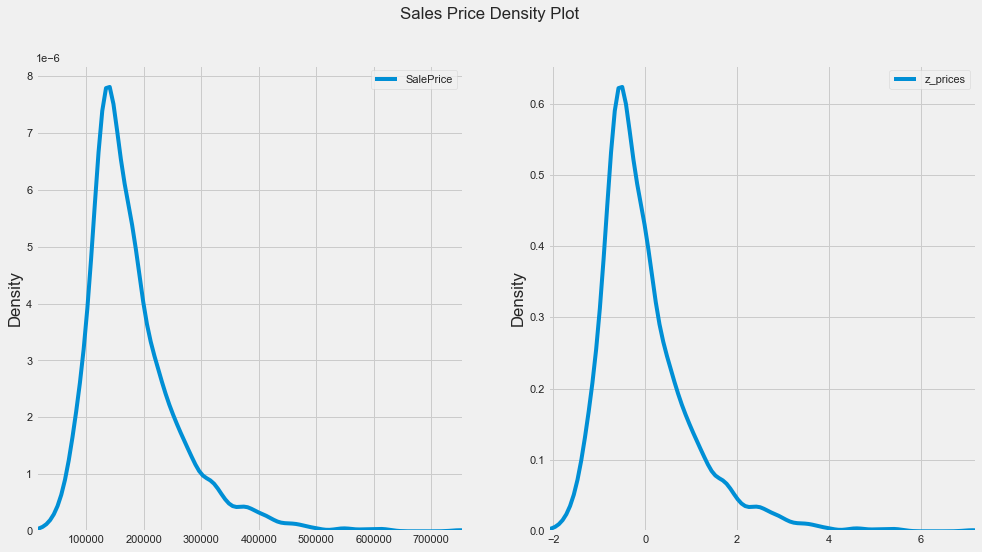

In [72]:
sns.set()
plt.style.use('fivethirtyeight')
fig,axs = plt.subplots(1,2,figsize=(15,8))
plt.suptitle('Sales Price Density Plot')
sns.kdeplot(df['SalePrice'],ax=axs[0])
sns.kdeplot(df['z_prices'],ax=axs[1])
# axs[0].set_xlim(df['SalePrice'].min(),df['SalePrice'].max())
# axs[1].set_xlim(df['z_prices'].min(),df['z_prices'].max())

axs[0].set(ylabel='Density',xlim=(df['SalePrice'].min(),df['SalePrice'].max()))
axs[1].set(ylabel='Density',xlim=(df['z_prices'].min(),df['z_prices'].max()))
# df['z_prices'].plot.kde(xlim=(df['z_prices'].min(),df['z_prices'].max()))

<AxesSubplot:>

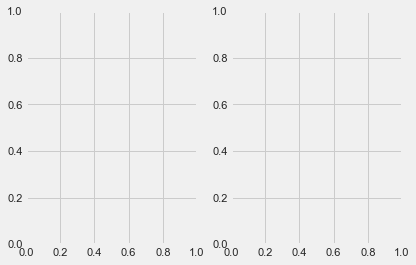

In [74]:
# if doing subplots, we acan also use plt.subplot to added additional axs one by one...
plt.subplot(1,2,1)
plt.subplot(1,2,2)

In [76]:
z_mean_price = df['z_prices'].mean()
z_stdev_price = df['z_prices'].std(ddof=0)

print(f'the mean of z-prices column is {z_mean_price}')
print(f'the standard deviation of z-prices column is {z_stdev_price}')

the mean of z-prices column is -1.1429992333726227e-16
the standard deviation of z-prices column is 1.0000000000000002


In [80]:
df['z_LotArea'] = df['Lot Area'].apply(lambda x: (x-df['Lot Area'].mean()) / df['Lot Area'].std(ddof=0))

z_mean_area = df['z_LotArea'].mean()
z_stdev_area = df['z_LotArea'].std(ddof=0)

print(f'the mean of z-Lot Area column is {z_mean_area}')
print(f'the standard deviation of z-Lot Area column is {z_stdev_area}')

the mean of z-Lot Area column is 8.771898641662927e-18
the standard deviation of z-Lot Area column is 0.9999999999999997


### In fact, for every distribution of z-scores, the mean is always 0 and the standard deviation is always 1. 

- for a normal distribution with mean=180,000 and std = 10,000, z-score for a value = 180,000 is equal to (180,000 - 180,000)/10,000 = 0


- and z-score for a value =190,000 is equal to (190,000-180,000)/10,000 = 1


- Therefore, for a **z-score distribution**, **mean** is always **0** and **standard deviation** is **1**. We often called a **standard distribution**. When we convert a distribution to z-scores, we'd say in statistical jargon that we **standardized** the distribution.  


- We denote with $μ_{z}$ the mean of a distribution of z-scores, and with $σ_{z}$ the standard deviation of a distribution of z-scores. We can show mathematically that $μ_{z}$ =0 and $σ_{z}$ =1 for any distribution of z-scores.


- Because locations are preserved, $μ_{z}$ is equal to the z-score of the mean μ in the original population. The z-score of μ is 0 for any value of μ because:

![statistics-pic-11](https://raw.githubusercontent.com/tongNJ/Dataquest-Online-Courses-2022/main/Pictures/statistics-pic-11.PNG)

- $σ_{z}$ is equal to the z-score of the first value that is one standard deviation above the mean (that would be 190000 in the example above). We can refer to the first value that is one standard deviation above the mean as μ+σ, and we can see that the z-score of μ+σ is 1 for any value of μ and σ:

![statistics-pic-12](https://raw.githubusercontent.com/tongNJ/Dataquest-Online-Courses-2022/main/Pictures/statistics-pic-12.PNG)

In [89]:
# Let's standardized sample P with Bessel's correction
p=[0,8,0,8]

p_mean = np.mean(p)
p_std = np.std(p,ddof=1)

standardized_sample =[]
for i in p:
    z = (i-p_mean)/p_std
    standardized_sample.append(z)

np.std(standardized_sample,ddof=1)
                                            

1.0

In [92]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [97]:
print(df.iloc[1])

Order                     2
PID               526350040
MS SubClass              20
MS Zoning                RH
Lot Frontage             80
                    ...    
Sale Type               WD 
Sale Condition       Normal
SalePrice            105000
z_prices          -0.948957
z_LotArea        -0.0684483
Name: 1, Length: 84, dtype: object
